In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vighn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vighn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
from keras.models import load_model
import random

In [3]:
words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('intents.json', encoding='utf-8').read()
intents = json.loads(data_file)

In [4]:
for intent in intents['intents']:
    for pattern in intent['patterns']:

        w = nltk.word_tokenize(pattern)
        words.extend(w)

        documents.append((w, intent['tag']))


        if intent['tag'] not in classes:
            classes.append(intent['tag'])

words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
classes = sorted(list(set(classes)))

In [5]:
print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(words), "unique lemmatized words", words)

51 documents
9 classes ['audio', 'computer', 'display', 'gaming', 'goodbye', 'greeting', 'name', 'phone', 'thanks']
77 unique lemmatized words ['a', 'accessory', 'address', 'adios', 'am', 'any', 'are', 'best', 'business', 'buy', 'bye', 'call', 'can', 'computer', 'do', 'earphone', 'for', 'gamer', 'gamers', 'gaming', 'get', 'good', 'goodbye', 'have', 'hd', 'headphone', 'headset', 'hello', 'help', 'hey', 'hi', 'hobby', 'how', 'i', 'is', 'laptop', 'later', 'like', 'looking', 'me', 'mobile', 'monitor', 'much', 'my', 'name', 'need', 'party', 'personal', 'phone', 'place', 'product', 'purchase', 'recommendation', 'see', 'select', 'should', 'show', 'smartphone', 'some', 'speaker', 'television', 'tell', 'thank', 'thanks', 'the', 'to', 'tv', 'ultra', 'up', 'very', 'want', 'what', 'where', 'which', 'who', 'you', 'your']


In [6]:
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

In [7]:
# initializing training data
training = []
output_empty = [0] * len(classes)
for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]

    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

random.shuffle(training)
training = np.array(training)

C:\Users\vighn\anaconda3\envs\TF\lib\site-packages\ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [8]:
train_x = list(training[:,0])
train_y = list(training[:,1])

In [9]:
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

In [10]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

C:\Users\vighn\anaconda3\envs\TF\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [11]:
history = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
model.save('chatbot_model.h5', history)

Epoch 1/200
11/11 [==============================] - 1s 17ms/step - loss: 2.2199 - accuracy: 0.1569
Epoch 2/200
11/11 [==============================] - 0s 3ms/step - loss: 2.1498 - accuracy: 0.1569
Epoch 3/200
11/11 [==============================] - 0s 3ms/step - loss: 2.0909 - accuracy: 0.1765
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 2.0069 - accuracy: 0.1765
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 1.9074 - accuracy: 0.3922
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 1.9020 - accuracy: 0.3137
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 1.8392 - accuracy: 0.3529
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 1.5841 - accuracy: 0.5294
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 1.5918 - accuracy: 0.5098
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 1.5688 - accuracy: 0.4902
Epoch 11

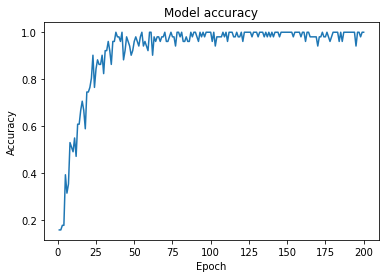

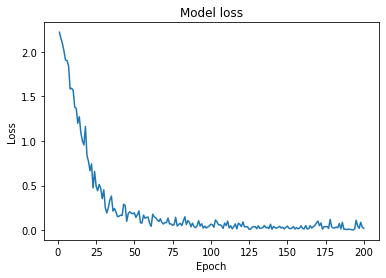

In [12]:
import matplotlib.pyplot as plt
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.show()
plot_learningCurve(history, 200)

In [13]:
model = load_model('chatbot_model.h5')

In [14]:
intents = json.loads(open('intents.json', encoding='utf-8').read())
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

In [15]:
def clean_up_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

In [16]:
# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=True):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

In [17]:
def predict_class(sentence, model):
    # filter out predictions below a threshold
    p = bow(sentence, words, show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

In [18]:
def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
        else:
            result = "You must ask the right questions"
    return result

In [19]:
def chatbot_response(msg):
    ints = predict_class(msg, model)
    res = getResponse(ints, intents)
    return res

In [20]:
chatbot_response('What is best for gaming')

'Playstation is better for exclusive games'